In [20]:
pip install folium 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\ReDI_NRW_800\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [21]:
pip install geopandas

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\ReDI_NRW_800\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [22]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # Plotly Express for interactive plots
import folium  # For map visualizations
from folium.plugins import MarkerCluster

# Geo data
import geopandas as gpd



## Understanding the locations of water pumps 

In [23]:
# Load merged dataset 

merged_dataset_url = "https://raw.githubusercontent.com/fsmariam/HydroLogic/refs/heads/main/data/processed/Merged_Training_Set.csv"
df_train = pd.read_csv("https://raw.githubusercontent.com/fsmariam/HydroLogic/refs/heads/main/data/processed/Merged_Training_Set.csv")

In [24]:
df_train.shape

(59400, 41)

In [25]:
#Tanzania generally falls within: Latitude: -12 to 0 and Longitude: 29 to 41

# Invalid lat/lon = zero or outside Tanzania bounds
invalid_coords = df_train[
(df_train['latitude'] == 0) |
(df_train['longitude'] == 0) |
(df_train['latitude'] < -12) | (df_train['latitude'] > 0) |
(df_train['longitude'] < 29) | (df_train['longitude'] > 41)
]

print(f"Rows with invalid or suspicious coordinates: {invalid_coords.shape[0]}")

Rows with invalid or suspicious coordinates: 1812


In [26]:
# Check ward presence
ward_assigned = invalid_coords['ward'].notnull().sum()
ward_missing = invalid_coords['ward'].isnull().sum()

print(f"Invalid coordinates with WARD assigned: {ward_assigned}")
print(f"Invalid coordinates with WARD missing: {ward_missing}")

Invalid coordinates with WARD assigned: 1812
Invalid coordinates with WARD missing: 0


In [27]:
invalid_coords[['latitude', 'longitude', 'region', 'district_code', 'ward', 'subvillage']].sample(20)

,latitude,longitude,region,district_code,ward,subvillage
16121,-2.000000e-08,0.0,Shinyanga,1,Chinamili,Nyang'Ogo
35995,-2.000000e-08,0.0,Shinyanga,1,Lagangabilili,Mwamili
49906,-2.000000e-08,0.0,Mwanza,6,Katoro,K/Center
21206,-2.000000e-08,0.0,Shinyanga,1,Kasoli,Ngeme
4564,-2.000000e-08,0.0,Shinyanga,1,Bumera,Mwabayanda
36890,-2.000000e-08,0.0,Shinyanga,1,Chinamili,Nanga B
27706,-2.000000e-08,0.0,Mwanza,6,Mtakuja,Ulongoni
9060,-2.000000e-08,0.0,Shinyanga,1,Nkoma,Mitobo B
54433,-2.000000e-08,0.0,Mwanza,2,Kalemela,Wala
43956,-2.000000e-08,0.0,Shinyanga,1,Mwaswale,Nyabuchama


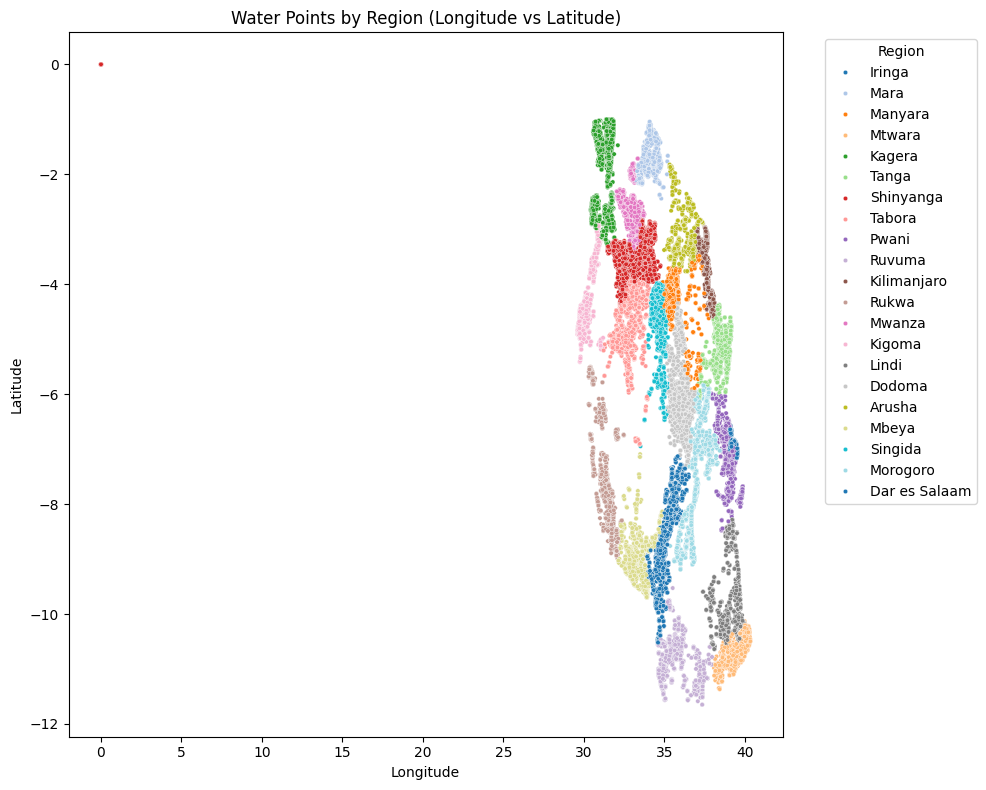

In [28]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_train, x='longitude', y='latitude', hue='region', palette='tab20', s=10)
plt.title('Water Points by Region (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Region')
plt.tight_layout()
plt.show()

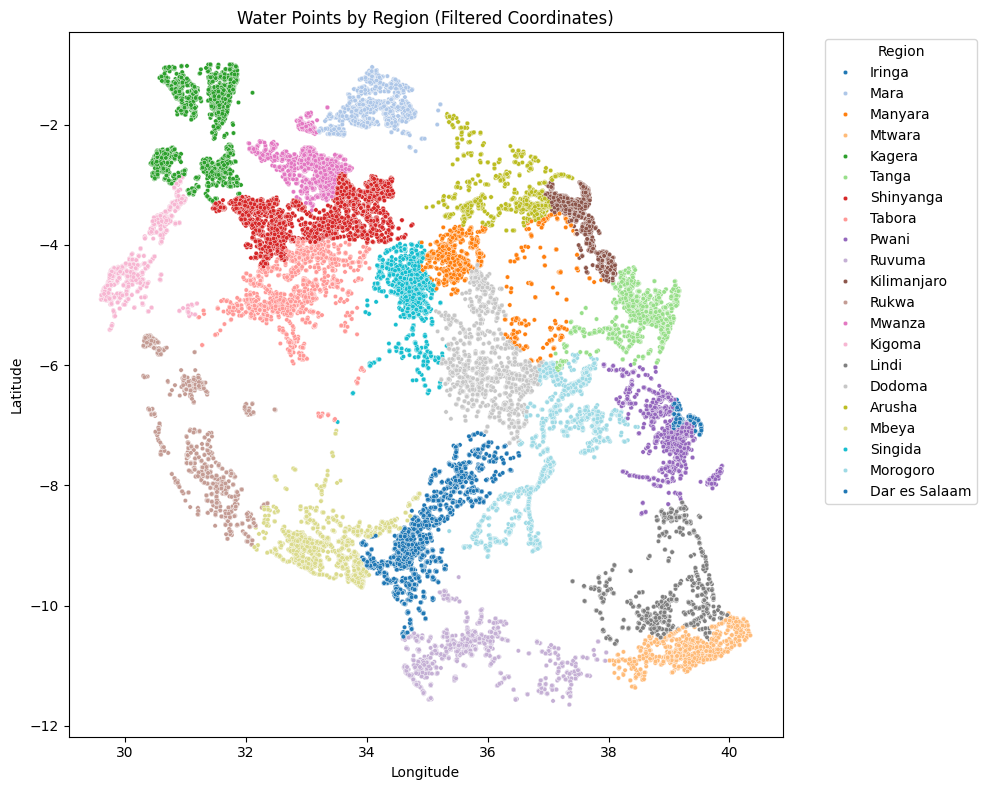

In [29]:
# Define valid coordinate bounds for Tanzania
valid_coords = df_train[
(df_train['latitude'] >= -12.5) & (df_train['latitude'] <= -0.5) &
(df_train['longitude'] >= 29.0) & (df_train['longitude'] <= 41.5)
]

# Scatterplot without outliers
plt.figure(figsize=(10, 8))
sns.scatterplot(
data=valid_coords,
x='longitude', y='latitude',
hue='region', palette='tab20', s=10
)
plt.title('Water Points by Region (Filtered Coordinates)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Region')
plt.tight_layout()
plt.show()

In [30]:
# Top ten regions with most water points

top_regions = df_train['region'].value_counts().head(10)
print(top_regions)

region
Iringa         5294
Shinyanga      4982
Mbeya          4639
Kilimanjaro    4379
Morogoro       4006
Arusha         3350
Kagera         3316
Mwanza         3102
Kigoma         2816
Ruvuma         2640
Name: count, dtype: int64


In [31]:
# Tanzania GPS bounds
lat_min, lat_max = -12.5, -0.5
lon_min, lon_max = 29.0, 41.5

# Limit to top 5 regions
top_region_names = top_regions.index.tolist()

# Generate maps for each top region with valid coordinates only
for region in top_region_names:
    region_df = df_train[
        (df_train['region'] == region) &
        (df_train['latitude'] >= lat_min) & (df_train['latitude'] <= lat_max) &
        (df_train['longitude'] >= lon_min) & (df_train['longitude'] <= lon_max)
    ].copy()

    # Skip if region has no valid points
    if region_df.empty:
        print(f"Skipping {region} — no valid coordinates.")
        continue

    # Create base map centered on mean lat/lon of filtered data
    m = folium.Map(
        location=[region_df['latitude'].mean(), region_df['longitude'].mean()],
        zoom_start=8
    )

    marker_cluster = MarkerCluster().add_to(m)

    # Add sampled markers (for performance)
    for _, row in region_df.sample(min(500, len(region_df)), random_state=1).iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"<b>Ward:</b> {row['ward']}<br><b>Subvillage:</b> {row['subvillage']}"
        ).add_to(marker_cluster)

    # Save to HTML
    m.save(f"{region.lower()}_map.html")
    print(f"✅ Map for {region} saved as '{region.lower()}_map.html'")

✅ Map for Iringa saved as 'iringa_map.html'
✅ Map for Shinyanga saved as 'shinyanga_map.html'
✅ Map for Mbeya saved as 'mbeya_map.html'
✅ Map for Kilimanjaro saved as 'kilimanjaro_map.html'
✅ Map for Morogoro saved as 'morogoro_map.html'
✅ Map for Arusha saved as 'arusha_map.html'
✅ Map for Kagera saved as 'kagera_map.html'
✅ Map for Mwanza saved as 'mwanza_map.html'
✅ Map for Kigoma saved as 'kigoma_map.html'
✅ Map for Ruvuma saved as 'ruvuma_map.html'
